#Мини-проект 1: Моделирование и визуализация данных (крайний срок - 1 октября)
#Преподаватель: Р.Х.Латыпов, 11.09.2021

В этом проекте необходимо провести моделирование и визуализацию данных с помощью предпочитаемого языка программирования.

Размер данных D = 4 (количество строк матрицы). Необходимо случайным образом сгенерировать M выборок, минимум M = 100 (количество столбцов матрицы) .

Четыре строки в этой матрице будут содержать информацию о росте, весе, уровне глюкозы и метку в {0, 1}, указывающую на здоровье (0) или заболевание (диабет) (1).

Для начала подключаем необходимые библиотеки, это:
NumPy - в основном необходим для работы с массивами, 
MatPlotLib - необходим для построения графиков,
random - необходим для заполнения некоторых строк массива (Мы не используем random библиотеки NumPy, потому что у numpy.random нет функции "normalvariate", а по условию задачи, данные в первых 2-ух строках должны быть нормально распределенными) и библиотека Scipy нужна для создания независимых одинаково распределённых случайных величин.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as sps

#(a) Сформируйте матрицу данных X размером 4×100, изначально заполненную нулями.

In [ ]:
X = np.zeros((4, 100))

#b) Заполните первую строку независимыми одинаковораспределёнными случайными величинами (i.i.d) N(165,25) (моделированиеростачеловека), а вторую строку - с i.i.d. случайными величинами N(62,100) (имитация веса человека).

In [ ]:
sample = sps.norm(loc=165, scale=25).rvs(size=100)
X[0] = sample
sample = sps.norm(loc=62, scale=100).rvs(size=100)
X[1] = sample

Первая строка - Рост

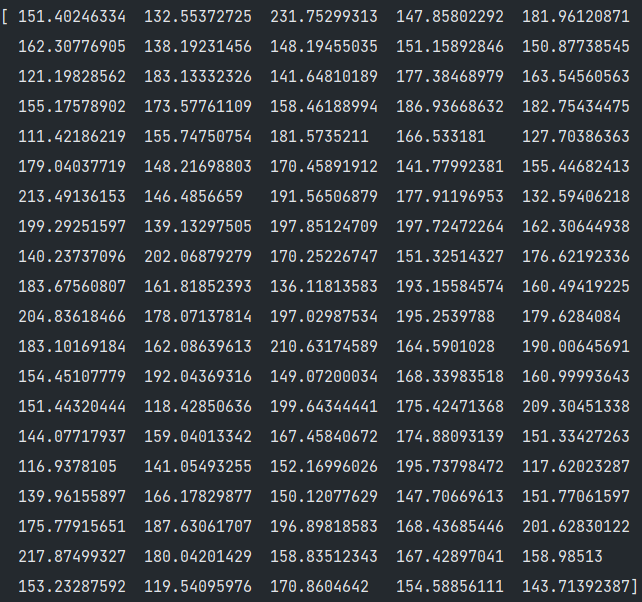

Вторая строка - Вес

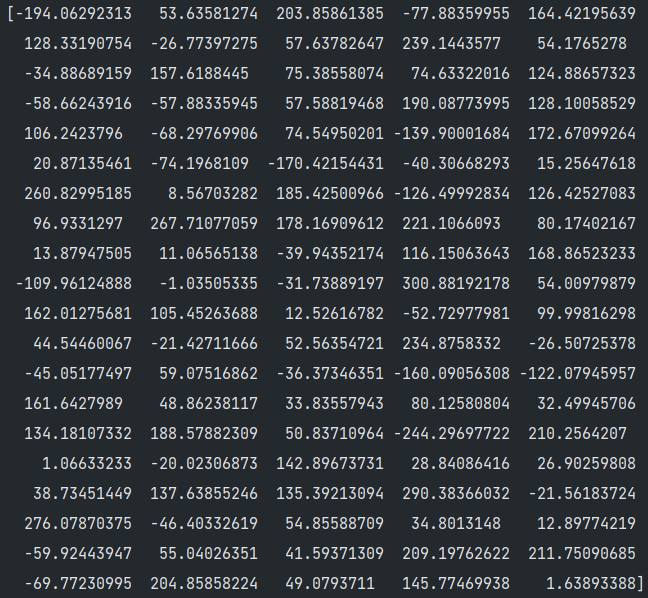

#(c) Имеют ли эти данные смысл ? Все ли пары величин разумны ? Как бы вы очистили/предварительно обработали эти данные ? Проведите очистку.

Наши уже сформированные по первым двум строкам данные (Рост, Вес) можно использовать для вычисления значения индекса массы тела. Как раз свой индекс массы тела должен знать каждый диабетик, т.к лишний вес может привести к сахарному диабету второго типа.

ИМТ рассчитывается по очень простой формуле — Ваш вес в килограммах необходимо разделить на Ваш рост в метрах, возведённый в квадрат.

Показатель 16 и менее говорит об остром дефиците веса;

16,1-17,91 — недостаток веса;

18,1-24,0 — нормальный вес;

25-29,91 — избыточный вес;

30,0-34,91 — ожирение первой степени;

35,0-39,91 — ожирение второй степени;

показатель выше сорока говорит о морбидном ожирении или ожирении третьей степени.

Рассчитаем максимальный и минимальный ИМТ

In [ ]:
# Рассчитываем IMT для каждой пары роста и веса.
IMT = X[1] / np.power(X[0] / 100, 2)

print("Максимальный ИМТ: ", np.max(IMT))
print("Минимальный ИМТ: ", np.min(IMT))

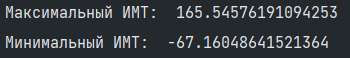

Так как очевидно, что значения ИМТ совершенно неправильные, то мы вынуждены "нормализовать" их.

In [ ]:
X[0] = np.int32(15 * np.random.randn(100) + 180) # Рост

IMT = 4 * np.random.randn(100) + 30

print("Максимальный ИМТ: {0}".format(round(np.max(IMT)), 1))
print("Минимальный  ИМТ: {0}".format(round(np.min(IMT)), 1))

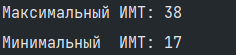

#(d) Визуализируйте / нанесите на график свои предварительно обработанные данные.

In [ ]:
# Визуализация данных IMT
plt.hist(IMT)
plt.xlabel("IMT")
plt.show()

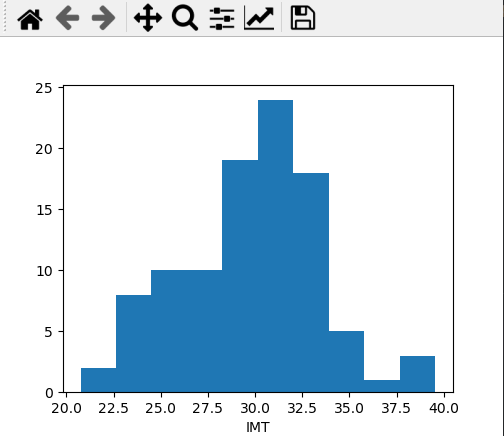

#(e) Вычислите отношение веса и роста для каждой выборки и постройте гистограмму соотношений.

In [ ]:
otnoshenie = X[0] / X[1]

plt.hist(otnoshenie)
plt.xlabel("Рост\Вес")
plt.show()

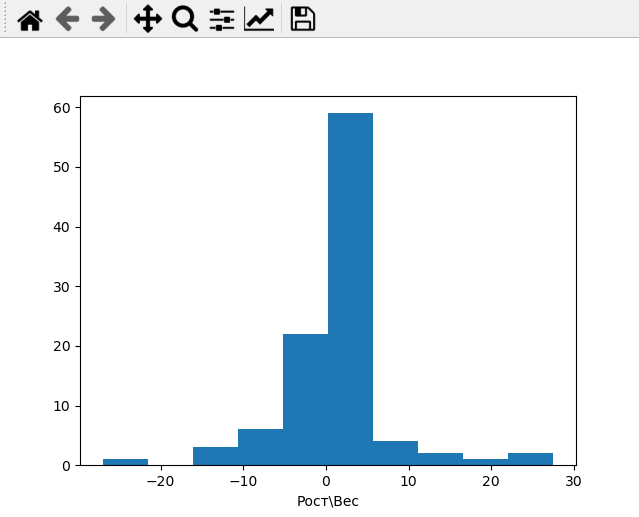

#(f) Смоделируйте уровень глюкозы каждого человека как зашумленную версию его отношения веса к росту (соотношение + шум) и сохраните это значение в третьей строке матрицы данных X. Пусть шум будет i.i.d. N (0, σ^2), σ - стандартное отклонение - параметр.

In [ ]:
noise = np.random.normal(0, np.std(otnoshenie) / 100)
X[2] = noise + otnoshenie

print(X)

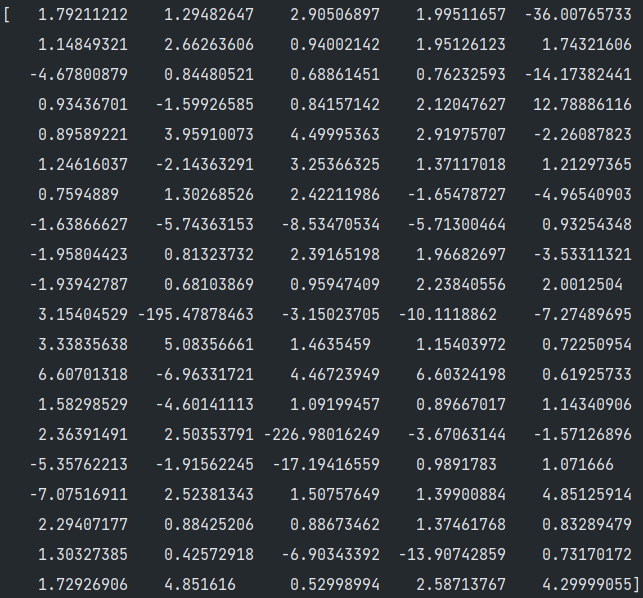

#g) Будем моделировать человека как здорового (метка = 0), если его уровень глюкозы (как определено выше) ниже порогового значения τ, и как диабетика в противном случае (метка = 1). Сохраните эти метки в четвертой строке матрицы данных X.

In [ ]:
t = 1.2

for i in range(100):
    if X[2][i] < t:
        X[3][i] = 1
    else:
        X[3][i] = 0

print(X)

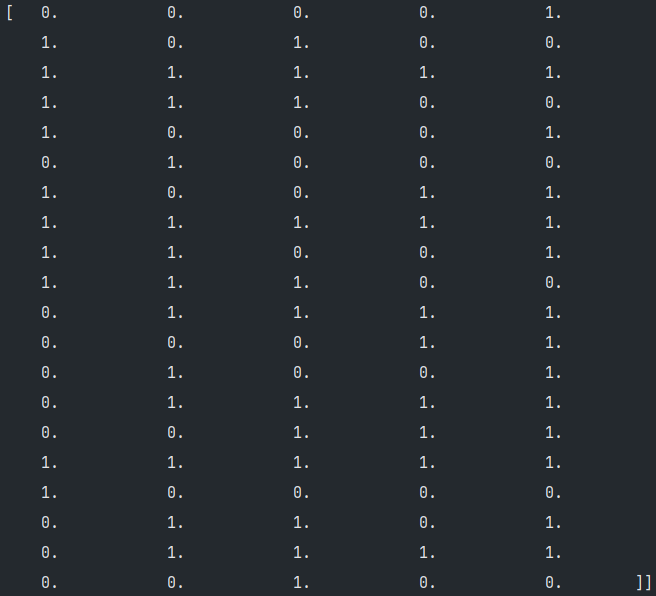

#(h) Визуализируйте / нанесите на график сгруппированные данные для различных значений σ и τ

Для перебора всех σ и τ нам необходимы: массив шагов от 0 до 1 с шагом 0.1 и  целочисленная матрица 10 на 10, далее заполняем матрицу следуя шагам из массива шагов.

In [ ]:
x = 0.0
i = 0
it = np.zeros(10)
# Создаем матрицу 10 x 10
alpha_t = np.zeros((10, 10), dtype=np.int32)

while x < 0.9:
    it[i] = round(x, 1)
    i += 1
    x += 0.1

print(it)

for i, f in enumerate(it):
    alt = np.random.normal(0, f) + otn
    print(f)
    print(i)
    for j, g in enumerate(it):
        alpha_t[i, j] = np.sum(alt < (g * 10))

print(alpha_t)

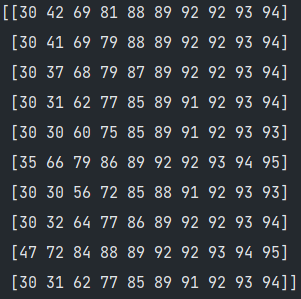

И создаём саму нашу гистограмму:

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Больные от σ и τ")

for i in range(10):
    plt.plot(it, alpha_t[i], label='σ={0}'.format(it[i]))

for i in range(10):
    plt.plot(it, alpha_t[:, i], label='τ={0}'.format(it[i]))

plt.xlabel("σ и τ")

plt.grid()
plt.legend()
plt.show()

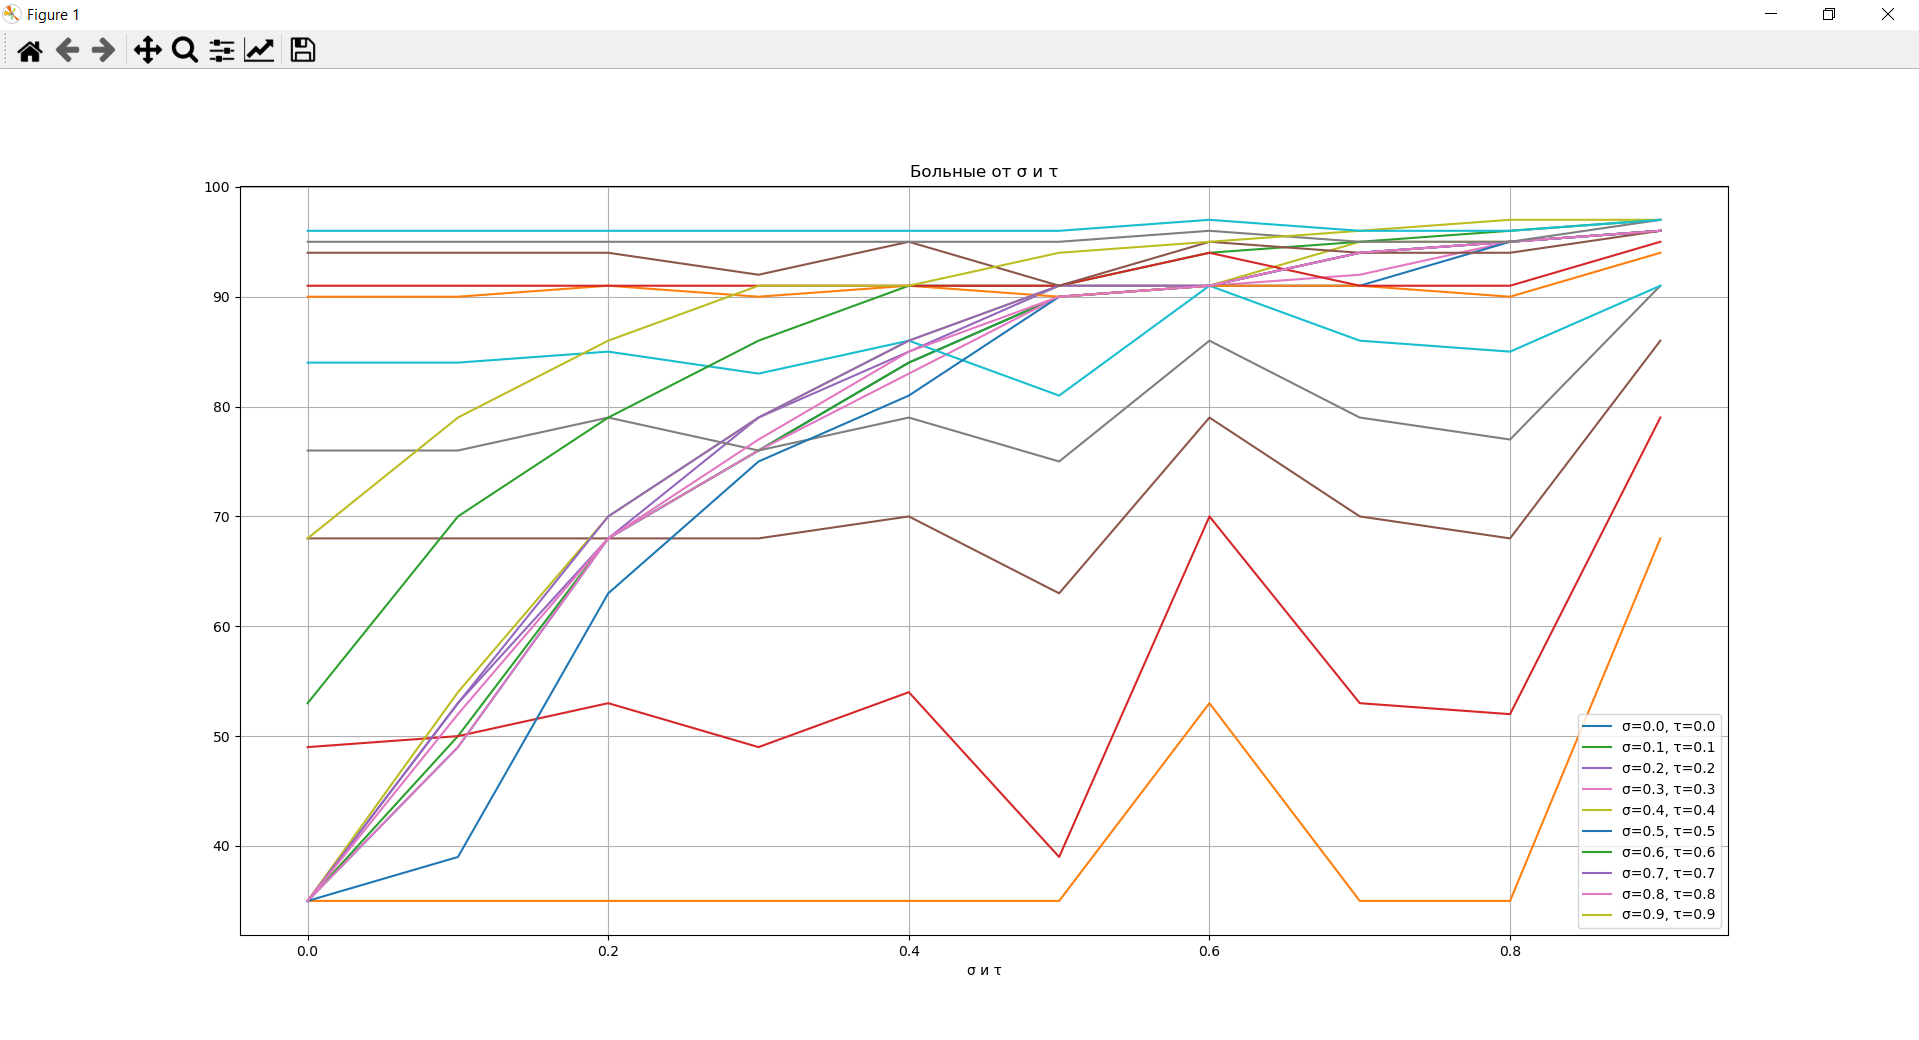

#(i) Как σ и τ влияют на данные?

Когда σ меняется от 0 до 1 с шагом 0.1, кол-во больных пациентов постепенно возрастает.

Когда τ меняется от 0 до 1 с шагом 0.1, кол-во больных большое с некоторыми несущественными отклонениями, к концу немного непонятно из за слишком малого колличества шагов, но видно, что кол-во больных резко возрастает.